# Interpolation - Scipy


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Interpolation

## Fundamentals

The * interpolation * consists in finding a function $ f (x) $ such that, given the abscissa 
$$
x_0, x_1, \ cdots, x_ {n-1}
$$
and its corresponding ordered values
$$
Y_0, Y_1, \ cdots, y_ {n-1}
$$
It is verified that:
$$
f (x_i) = y_i \; \; \; \ textrm {for any} \; \; 0 \ le i <n
$$

If we think about the plane, we want to look for a $ f (x) curve that passes through all points $ (x_i, y_i) $, with $ 0 \ le i <n $.


In [2]:
xData = np.linspace(-3,3,11)
xData

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [3]:
yData = np.array([1.23409804e-04, 3.15111160e-03, 3.91638951e-02, 2.36927759e-01,
       6.97676326e-01, 1.00000000e+00, 6.97676326e-01, 2.36927759e-01,
       3.91638951e-02, 3.15111160e-03, 1.23409804e-04])
yData

array([1.23409804e-04, 3.15111160e-03, 3.91638951e-02, 2.36927759e-01,
       6.97676326e-01, 1.00000000e+00, 6.97676326e-01, 2.36927759e-01,
       3.91638951e-02, 3.15111160e-03, 1.23409804e-04])

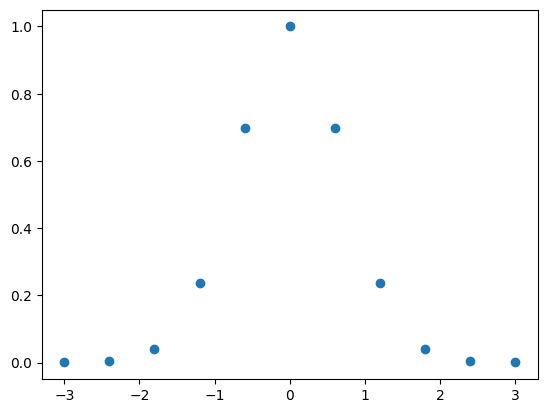

In [4]:
plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.show()

> Interpolation has two stages:
1. Find the interpolation function $ f (x) $
2. Evaluate the interpolation function in the desired values

## Polynomial interpolation (Newton)

Of course it is extremely difficult to find a function $ f (x) $ general for any number of points $ (x_i, y_i) $ as data. That is why * Polynomials * of different degrees are used to satisfy the conditions of the interpolation. 

One of the possible functional forms corresponds to Newton's polynomials, defined as:

$$
P_n (x) = a_0 + a_1 (x-x_0) + a_2 (x-x_0) (x-x_1) + \ cdots + a_n (x-x_0) (x-x_1) (x-x_2) \ cdots (x-x_ {n-1})
$$

For example, Newton's polynomial to adjust three points $ (x_0, y_0) $, $ (x_1, y_1) $ and $ (x_2, y_2) $ is:

$$
P_2 (x) = a_0 + a_1 (x-x_0) + a_2 (x-x_0) (x-x_1)
$$

And in this case, we have to look for values ​​$ a_0, a_1, a_2 $ so that:

\ Begin {align}
Y_0 & = P_2 (x_0) \\
Y_1 & = P_2 (x_1) \\
Y_2 & = P_2 (x_2) 
\ end {align}
Replacing:

\ Begin {align}
Y_0 & = a_0 \\
y_1 & = a_0 + a_1 (x_1 - x_0) \\
Y_2 & = a_0 + a_1 (x_2-x_0) + a_2 (x_2-x_0) (x_2-x_1)
\ end {align}

This system is simple to solve, starting with the first equation

$$
a_0 = y_0
$$

Continuing for the second:
\ Begin {align}
y_1 & = y_0 + a_1 (x_1 - x_0) \\
y_1 - y_0 & = a_1 (x_1 - x_0) \\
a_1 & = \ fraud {y_1 - y_0} {x_1 - x_0}
\ end {align}

and finally replacing $ a_0 and $ a_1 $ in the third equation:
\ Begin {align}
y_2 & = a_0 + a_1 (x_2-x_0) + a_2 (x_2-x_0) (x_2-x_1) \\
y_2 & = y_0 + \ fraud {y_1 - y_0} {x_1 - x_0} (x_2 - x_0) + a_2 (x_2 -x_0) (x_2 -x_1) \\
a_2 (x_2 -x_0) (x_2 -x_1) & = y_2 - y_0 - \ fraud {y_1 - y_0} {x_1 - x_0} (x_2 - x_0) 
\ end {align}
with

$$
a_2 = \ fraud {y_2 - y_0} {(x_2 -x_0) (x_2 -x_1)} - \ fraud {y_1 - y_0} {x_1 - x_0} \ fraud {x_2 - x_0} {(x_2 -x_0) (x_2 -x_1) 
$$

Simplifying:

$$
a_2 = \ fraud {y_2 - y_0} {(x_2 -x_0) (x_2 -x_1)} - \ fraud {y_1 - y_0} {(x_1 - x_0) (x_2 -x_1)}}}}  
$$



Polynomials are built in such a way that:

#### They are easy to evaluate numerically

For example, in the case of $ P_3 (x) $:

\ Begin {align}
P_3 (x) & = a_0 + a_1 (x-x_0) + a_2 (x-x_0) (x-x_1) + a_3 (x-x_0) (x-x_1) (x-x_2) \\
       & = a_0 + (x - x_0) \ left [a_1 + a_2 (x - x_1) + a_3 (x -x_1) (x -x_2) \ right] \\
      & = a_0 + (x - x_0) \ left \ {a_1 + (x - x_1) \ left [a_2 + a_3 (x -x_2) \ right] \ right \}
\ end {align}

that if evaluated from behind forward, it remains:
\ Begin {align}
Q_0 (x) & = a_3 \\
Q_1 (x) & = a_2 + q_0 (x) (x - x_2) \\
Q_2 (x) & = a_1 + q_1 (x) (x - x_1) \\
Q_3 (x) & = a_0 + q_2 (x) (x - x_0)
\ end {align}
and obviously, $ q_3 (x) = p_3 (x) $

In general

$$
Q_0 (x) = a_n \; \; \; Q_k (x) = a_ {n-k} + (x-x_ {n-k}) q_ {k-1} (x)
$$



#### Find the values ​​of the coefficients is simple

As we saw before, the system of equations to be solved is triangular, and is easily resolved.


### Example

We copy the `Newtonpoly.py` module in the Labor Board.

In [5]:
import newtonPoly as newton

ModuleNotFoundError: No module named 'newtonPoly'

In [6]:
help(newton)

NameError: name 'newton' is not defined

Let's evaluate the coefficients for the data we had before

In [7]:
a = newton.coeffts(xData,yData)
a

NameError: name 'newton' is not defined

To graph, we generate a dense grid

In [8]:
xpoly = np.linspace(-3,3,100)

and we evaluate polynomial at all those points

In [9]:
ypoly = newton.evalPoly(a,xData,xpoly)

NameError: name 'newton' is not defined

NameError: name 'ypoly' is not defined

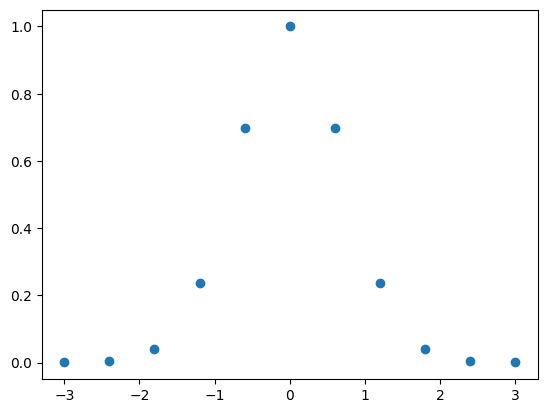

In [10]:
plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.plot(xpoly,ypoly,linestyle = 'dotted')
plt.show()

In [11]:
xpoly = np.linspace(-4,4,100)
ypoly = newton.evalPoly(a,xData,xpoly)
plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.plot(xpoly,ypoly,linestyle = 'dotted')
plt.show()

NameError: name 'newton' is not defined

## Interpolation to pieces (*Piecewise interpolation*)

As seen in the previous example, it is difficult to find a single function that can function as an interporator, and that in turn has a soft shape. That is why interpolation methods *to pieces *are used. For that, a set of functions $ \ {f (x) \} $ is defined so that each of them is used to interpolate only one particular sector of the domain $ x_0, x_1, \ cdots, x_n $.

Once the interpolation has been carried out, that is, once the functions $ \ {f (x) \} $, the evaluation of these functions (that is, stage 2. described before) is known, requires in turn two steps:

- Find what function should be used according to the $ x $ value
- Evaluate the selected function at $ x $

The first step is usually known as *lookup *.

We will see in detail the example of the *linear interpolation *.

### Linear interpolation

Undoubtedly, linear interpolation is the most used in medical physics. It consists in defining linear functions that will be used to interpolate all the values ​​of $ x $ between two adjacent abscissas $ x_i $ and $ x_ {i+1} $:

$$
p_i (x) = \ fraud {y_ {i+1} - y_i} {x_ {i+1} - x_i} (x - x_i)+y_i
$$

Indeed, 

$$
p_i (x_i) = \ fraud {y_ {i+1} - y_i} {x_ {i+1} - x_i} (x_i - x_i)+y_i = \ fraud
$$

while

$$
p_i (x_ {i+1}) = \ fraud
$$

That is to say that the function $ p_i (x) $ verifies the interpolation condition at $ x_i $ and $ x_ {i+1} $.


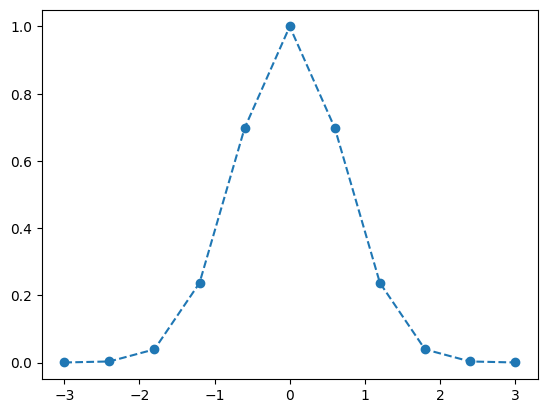

In [12]:
plt.plot(xData,yData, marker = 'o',linestyle = 'dashed')
plt.show()

### Cubic Splines

The other type of interpolation frequently corresponds to the so -called *cubic splines *. These are third order polynomials that are built between two contiguous abscissa $ x_i $ and $ x_ {i+1} $. However, in these cases, in addition to the conditions 

\ Begin {align}
y_i & = f (x_i) \\
y_ {i+1} & = f (x_ {i+1}),
\ end {align}

It is necessary to impose extra conditions since a polynomial of order 3 has 4 coefficients to be determined. In general, conditions can be imposed on the first derivatives of the function:
\ Begin {align}
y_i & = f '(x_i) \\
and '_ {i+1} & = f' (x_ {i+1}),
\ end {align}
Or the most common case, of the natural splines * in which it is requested
\ Begin {align}
f '' (x_i) & = 0 \\
f '' (x_ {i+1}) & = 0.
\ end {align}

The algebra to obtain them is a cumbersome, so they can consult it XX_MARKDOWN_LINK_XX.


## Rescue modules: Scipy

Fortunately, there is a module that does this kind of thing, and many more. This is the module XX_MarkDown_link_xx. In particular, we will use the `interpolate`:

In [13]:
from scipy.interpolate import interp1d

ModuleNotFoundError: No module named 'scipy'

#### Linear interpolation

In [14]:
f_lineal = interp1d(xData,yData)  # By default, interp1d interpolation is linear
xs = np.linspace(-3,3,100)
ylineal = f_lineal(xs)

plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.plot(xs,ylineal,linestyle = 'dotted')
plt.show()

NameError: name 'interp1d' is not defined

In [15]:
print(f_lineal(0.5))

NameError: name 'f_lineal' is not defined

#### Quadratic interpolation

In [16]:
f_quad = interp1d(xData,yData,kind='quadratic') # Defining the Kind parameter, other interpolations are obtained
yquad = f_quad(xs)

plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.plot(xs,yquad,linestyle = 'dotted')
plt.show()

NameError: name 'interp1d' is not defined

#### Cubic interpolation

In [17]:
f_cubic = interp1d(xData,yData,kind='cubic') # Defining the Kind parameter, other interpolations are obtained
ycubic = f_cubic(xs)

plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.plot(xs,ycubic,linestyle = 'dotted')
plt.show()

NameError: name 'interp1d' is not defined

We graph all adjustments together:

NameError: name 'xs' is not defined

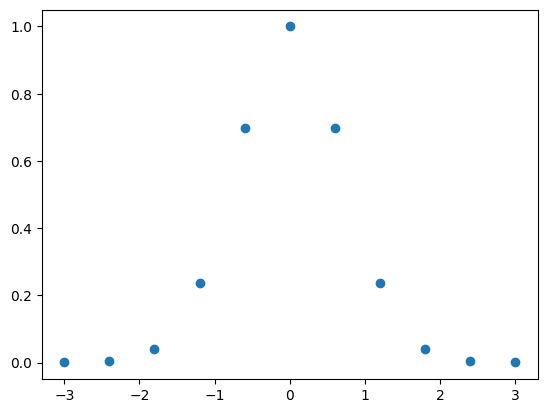

In [18]:
plt.plot(xData,yData, marker = 'o',linestyle = 'None')
plt.plot(xs,ylineal,linestyle = 'solid')
plt.plot(xs,yquad,linestyle = 'dashed')
plt.plot(xs,ycubic,linestyle = 'dotted')
plt.show()

## Fiteo of curves

Another frequent task is to adjust parameters of an objective function from a * dataset * of known points. 

Suppose we have a series of measured data

In [19]:
xdata = np.array([0.        , 0.08163265, 0.16326531, 0.24489796, 0.32653061,
       0.40816327, 0.48979592, 0.57142857, 0.65306122, 0.73469388,
       0.81632653, 0.89795918, 0.97959184, 1.06122449, 1.14285714,
       1.2244898 , 1.30612245, 1.3877551 , 1.46938776, 1.55102041,
       1.63265306, 1.71428571, 1.79591837, 1.87755102, 1.95918367,
       2.04081633, 2.12244898, 2.20408163, 2.28571429, 2.36734694,
       2.44897959, 2.53061224, 2.6122449 , 2.69387755, 2.7755102 ,
       2.85714286, 2.93877551, 3.02040816, 3.10204082, 3.18367347,
       3.26530612, 3.34693878, 3.42857143, 3.51020408, 3.59183673,
       3.67346939, 3.75510204, 3.83673469, 3.91836735, 4.        ])

ydata = np.array([ 2.86176601,  2.57905526,  2.70036593,  2.63066436,  1.8035502 ,
        1.69507105,  1.71332572,  1.19968728,  1.53954472,  1.19541914,
        0.90611978,  0.7115336 ,  0.80780086,  0.64485915,  0.85535322,
        0.61878794,  0.69171233,  0.64694833,  0.23714098,  0.18498906,
        0.58324814,  0.13810763,  0.12359655,  0.33529197,  0.15601467,
        0.59733706,  0.35817119,  0.11824581,  0.08785438,  0.49333643,
       -0.09737018, -0.11026946,  0.27281943,  0.10931485,  0.27558412,
       -0.27575616,  0.21938698, -0.05069495, -0.03916167,  0.28574475,
        0.15924156, -0.21736918,  0.1431817 , -0.1881811 ,  0.00901724,
       -0.31409179, -0.11894992, -0.11414616,  0.01245554,  0.04917944])

In [20]:
print(len(ydata))

50


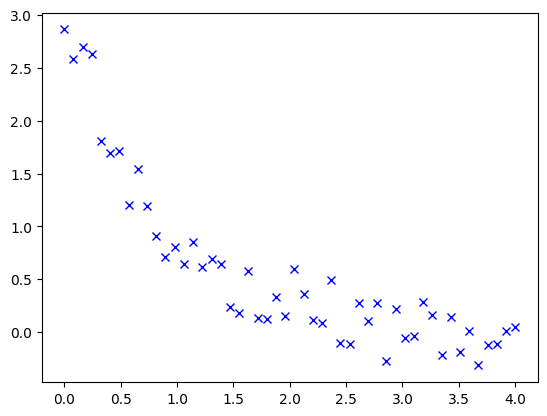

In [21]:
plt.plot(xdata, ydata, 'xb', label='DATOS')
plt.show()


In [22]:
def func(x, a, b, c, d):
    return a * np.exp(-b * x) + c * np.exp(-d * x)


In [23]:
from scipy.optimize import curve_fit


popt, pcov = curve_fit(func, xdata, ydata)
print(popt)

y1 = func(xdata, popt[0],popt[1],popt[2],popt[3])
# 
# A compact way of creating Y1 is:
# Y1 = Func (xdata, *popt)
# instead of 'unwinding POPT in its components [0] .. [3]

plt.plot(xdata, y1, 'r-', label='FITEO 1')

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5, 4.]))
y2 = func(xdata, *popt)
plt.plot(xdata, y2, 'g--', label='FITEO 2')   

plt.plot(xdata, ydata, 'xb', label='DATOS')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'scipy'

In [24]:
help(curve_fit)

NameError: name 'curve_fit' is not defined

In [25]:
print(pcov)
perr = np.sqrt(np.diag(pcov))
perr

NameError: name 'pcov' is not defined